#### Import some basic libraries

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

## Wine Quality Data

The UCI wine quality dataset uses  Portuguese "Vinho Verde" wine data to provide both classification and regression machine learning tasks. Users can attempt to classify wines as red/white, or predict the overall quality of wine.

The variables included in this dataset include:   
Input variables (based on physicochemical tests):    
1 - fixed acidity    
2 - volatile acidity    
3 - citric acid    
4 - residual sugar    
5 - chlorides    
6 - free sulfur dioxide    
7 - total sulfur dioxide    
8 - density    
9 - pH    
10 - sulphates    
11 - alcohol    

Output variable (based on sensory data):    
12 - quality (score between 0 and 10)   


Citation:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [2]:
def obtain_data():

    df_red = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ';')
    df_white = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
    
    df_white['category'] = 'white'
    df_red['category'] = 'red'
    
    df = pd.concat([df_white, df_red], axis=0)
    
    # remove spaces and replace with underscores
    df.columns = df.columns.str.replace(" ", "_")
    
    del df_white
    del df_red
    
    return df

df = obtain_data()
print (df.head())
print ('\n')
print (df.groupby('category')['pH'].count())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality category  
0      8.8        6    white  
1      9.5        6    w

### Evaluate Features with YellowBrick

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


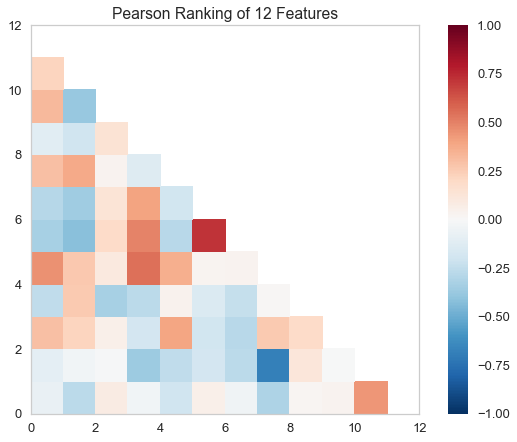

In [3]:
from yellowbrick.features.rankd import Rank2D 

X = df.ix[:,:-1]
y = df.ix[:,-1]

visualizer = Rank2D(features=X.columns, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()

In [4]:
X.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


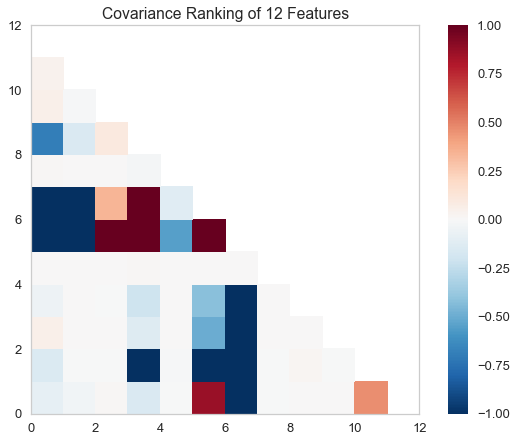

In [5]:
visualizer = Rank2D(features=X.columns, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()

In [6]:
X.cov()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.680740,0.046745,0.061122,-0.690720,0.013544,-6.506003,-24.112030,0.001784,-0.052675,0.057792,-0.147594,-0.086882
volatile_acidity,0.046745,0.027105,-0.009043,-0.153537,0.002175,-1.030242,-3.856933,0.000134,0.006921,0.005536,-0.007391,-0.038200
citric_acid,0.061122,-0.009043,0.021117,0.098490,0.000199,0.343372,1.603646,0.000042,-0.007706,0.001215,-0.001819,0.010854
residual_sugar,-0.690720,-0.153537,0.098490,22.636696,-0.021492,34.021685,133.244854,0.007883,-0.204498,-0.131635,-2.039567,-0.153646
chlorides,0.013544,0.002175,0.000199,-0.021492,0.001227,-0.121284,-0.553714,0.000038,0.000252,0.002062,-0.010735,-0.006139
free_sulfur_dioxide,-6.506003,-1.030242,0.343372,34.021685,-0.121284,315.041192,723.261972,0.001369,-0.416249,-0.497756,-3.807165,0.859664
total_sulfur_dioxide,-24.112030,-3.856933,1.603646,133.244854,-0.553714,723.261972,3194.720039,0.005491,-2.166696,-2.319079,-17.914646,-2.042704
density,0.001784,0.000134,0.000042,0.007883,0.000038,0.001369,0.005491,0.000009,0.000006,0.000116,-0.002456,-0.000801
pH,-0.052675,0.006921,-0.007706,-0.204498,0.000252,-0.416249,-2.166696,0.000006,0.025853,0.004597,0.023252,0.002739
sulphates,0.057792,0.005536,0.001215,-0.131635,0.002062,-0.497756,-2.319079,0.000116,0.004597,0.022143,-0.000538,0.005001


In [7]:
def logistic_regression(X, y):

    from sklearn.linear_model import LogisticRegression
    from sklearn import cross_validation as cv
    from sklearn.metrics import classification_report
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score

    # splits data into training and test sets. 70% train, 30% test.
    X_train, X_test, y_train, y_test = cv.train_test_split(X, y, test_size=0.3, random_state=0)

    stdsc      = StandardScaler()

    # z-scores training set data, then applies z-score formula from training set to test set.
    # this ensures the training data does not learn anything about the test data.
    X_train    = stdsc.fit_transform(X_train)
    X_test     = stdsc.transform(X_test)

    model      = LogisticRegression()
    model.fit(X_train, y_train)

    # make predictions on the test set. expected = actual risk, predicted = predicted risk, probs = probability of being risky
    expected   = y_test
    predicted  = model.predict(X_test)
    probs      = model.predict_proba(X_test)

    print ('Accuracy Score: %.2f%%' % (accuracy_score(expected, predicted) * 100))
    print (classification_report(expected, predicted))
    
    return X_train, y_train, X_test, y_test,  expected, predicted, probs,  model

In [8]:
from sklearn import cross_validation as cv
X = df.ix[:,:-1]
y = df.ix[:,-1]


X_train, y_train, X_test, y_test, expected, predicted, probs,  model = logistic_regression(X, y)

Accuracy Score: 99.59%
             precision    recall  f1-score   support

        red       0.99      0.99      0.99       463
      white       1.00      1.00      1.00      1487

avg / total       1.00      1.00      1.00      1950



### Evaluate Model Effectiveness with YellowBrick

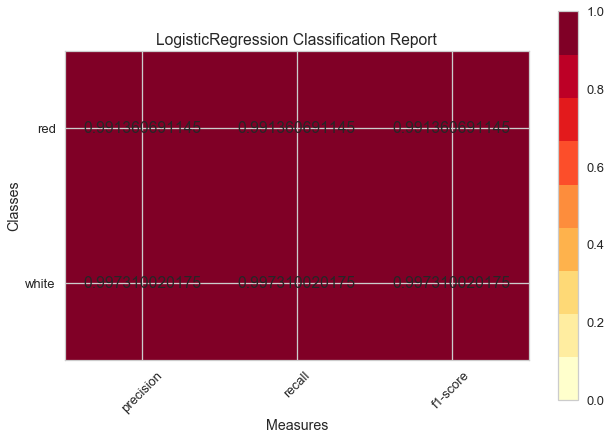

In [9]:
from yellowbrick.classifier import ClassificationReport, ROCAUC, ClassBalance
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
classes = ['red', 'white']

visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

In [10]:
# Instantiate the classification model and visualizer 
logistic = LogisticRegression()
visualizer = ROCAUC(logistic)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()     

ValueError: Data is not binary and pos_label is not specified

I am not 100% sure what to do from here. Where would I add pos_label?

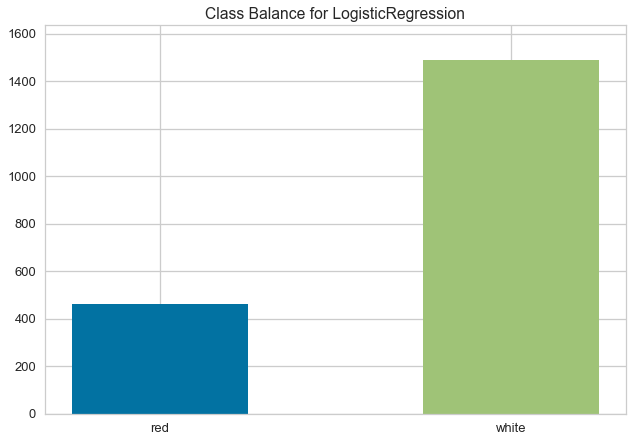

In [11]:
# Instantiate the classification model and visualizer 
forest = LogisticRegression()
visualizer = ClassBalance(forest, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof() 